In [114]:
import turicreate as tc
import numpy as np
from IPython.display import Image 

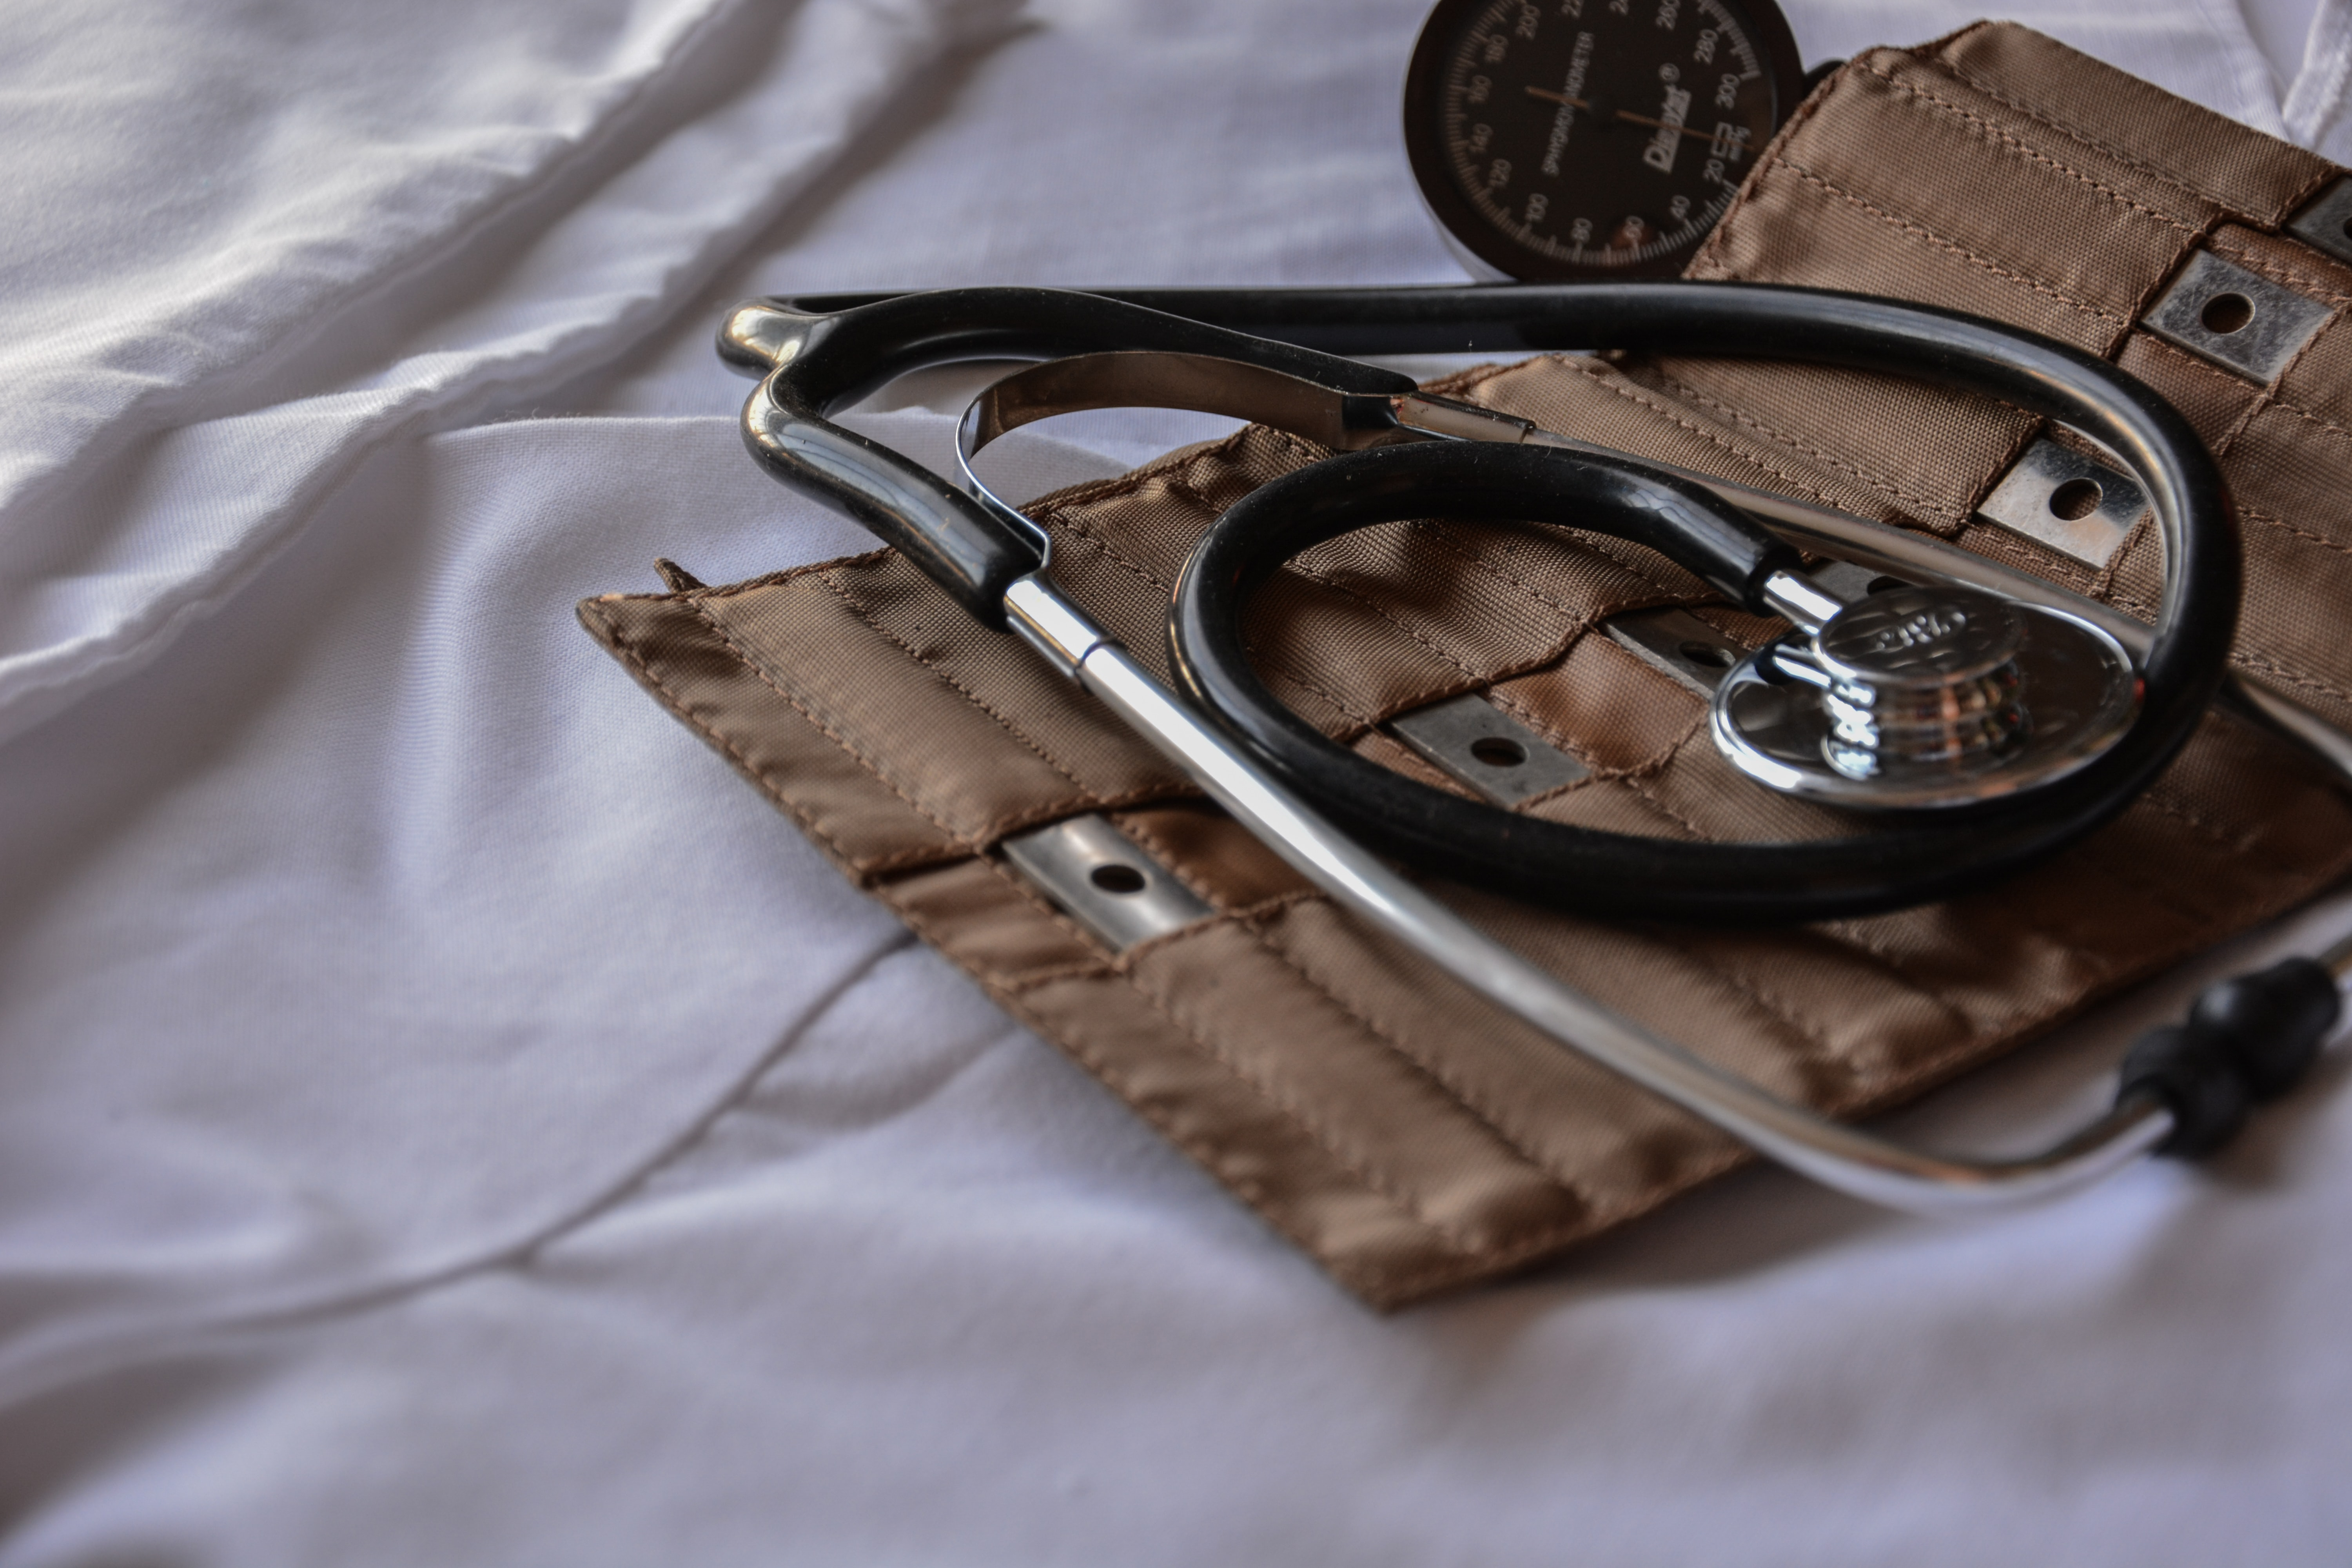

In [118]:
Image(filename='marcelo-leal-k7ll1hpdhFA-unsplash.jpg') 

# Preview
       
       
       This project dedicates to analyze the correlation between the probability of strokes and peoples demographic features and lifestyles. Eventually will be able to predict the chance of one having stroke given random variables.  Both linear regreassion and boolean regreassion would be applied in this case.
       
              

In [30]:
%config Completer.use_jedi = False

In [31]:
df = tc.SFrame.read_csv('healthcare-dataset-stroke-data.csv',na_values=['N/A','Unknown','None'])

Finished parsing file /Users/ruihao/Documents/Data Science/Jupyter Notebook/stroke prediction/healthcare-dataset-stroke-data.csv

Parsing completed. Parsed 100 lines in 0.013967 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,str,int,int,int,str,str,str,float,float,str,int]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /Users/ruihao/Documents/Data Science/Jupyter Notebook/stroke prediction/healthcare-dataset-stroke-data.csv

Parsing completed. Parsed 5110 lines in 0.006683 secs.

In [32]:
df.head

<bound method SFrame.head of Columns:
	id	int
	gender	str
	age	int
	hypertension	int
	heart_disease	int
	ever_married	str
	work_type	str
	Residence_type	str
	avg_glucose_level	float
	bmi	float
	smoking_status	str
	stroke	int

Rows: 5110

Data:
+-------+--------+-----+--------------+---------------+--------------+
|   id  | gender | age | hypertension | heart_disease | ever_married |
+-------+--------+-----+--------------+---------------+--------------+
|  9046 |  Male  |  67 |      0       |       1       |     Yes      |
| 51676 | Female |  61 |      0       |       0       |     Yes      |
| 31112 |  Male  |  80 |      0       |       1       |     Yes      |
| 60182 | Female |  49 |      0       |       0       |     Yes      |
|  1665 | Female |  79 |      1       |       0       |     Yes      |
| 56669 |  Male  |  81 |      0       |       0       |     Yes      |
| 53882 |  Male  |  74 |      1       |       1       |     Yes      |
| 10434 | Female |  69 |      0       |       

# Observations:

## General review 

In [33]:
df.plot()

Materializing SFrame

In [34]:
print('The mean gluclose level of the patients is: ', tc.SArray.mean(df['avg_glucose_level']),'mg/dL')
print('The mean bmi of the patients is: ', tc.SArray.mean(df['bmi']))


The mean gluclose level of the patients is:  106.1476771037182 mg/dL
The mean bmi of the patients is:  28.893236911794663


#### Notes:
    1. According to the general graphs, this sample prefers women over men, and prefers those with history of hyper tension and/or heart diseas. 
    2. It is also not hard to tell that this sample studies more married ones than unmarried ones. People working in praviate companies take the majority of the group. 
    3. The majority of the patients maintain a normal gluclose level below 140 mg/dL. While most of them maintain a bmi of 30 which indicates overweight or obese. 

## The relationships between numerical variables and the number of strokes :

In [35]:
strokes_only = df[df['stroke'] == 1]

In [36]:
strokes_only.plot()

Materializing SFrame

### Number of strokes by age:

In [37]:
tc.visualization.histogram(strokes_only['age'], title = 'Number of Strokes by Age', xlabel = 'Age', ylabel = 'Number of strokes')

Materializing SArray

In [38]:
print('The mean of samples age is: ',tc.SArray.mean(strokes_only['age']))
print('The maximum age in this sample is: ', tc.SArray.max(strokes_only['age']))
print('The minimum age: ', tc.SArray.min(strokes_only['age']))

The mean of samples age is:  67.72690763052208
The maximum age in this sample is:  82
The minimum age:  1


### Number of strokes by average glucose level: 

In [39]:
tc.visualization.histogram(strokes_only['avg_glucose_level'], xlabel = 'Average Glucose Gevel:mg/dL', title = 'Distrubition of Average Glucose Level')

Materializing SArray

In [40]:
print(tc.SFrame.num_rows(strokes_only[strokes_only['avg_glucose_level']< 140])/tc.SFrame.num_rows(strokes_only),' test-takers have healthy glucose level')

0.6265060240963856  test-takers have healthy glucose level


*The majority of the patients maintain a normal gluclose level below 140 mg/dL. 

### Number of strokes by BMI:

In [41]:
tc.visualization.histogram(strokes_only['bmi'], title = 'Distribution of BMI',xlabel = 'BMI')

Materializing SArray

In [42]:
print(tc.SFrame.num_rows(strokes_only[strokes_only['bmi']>30])/tc.SFrame.num_rows(strokes_only), 'of the stroked patients are obesed.')

0.3855421686746988 of the stroked patients are obesed.


In [43]:
print(tc.SFrame.num_rows(strokes_only[strokes_only['bmi']>30])/tc.SFrame.num_rows(strokes_only), 'of the stroked patients are obesed.')

0.3855421686746988 of the stroked patients are obesed.


# Data Cleaning

In [44]:
df = df.drop_duplicates(['id'])

In [45]:
df = df.dropna(how='any')

In [46]:
def transfergender(gender):
    if gender == 'Female':
        return 0
    else:
        return 1

In [47]:
df['gender'] = df['gender'].apply(transfergender)

In [48]:
def transfermarried(married):
    if married == 'Yes':
        return 1
    else: 
        return 0

In [49]:
df['ever_married']=df['ever_married'].apply(transfermarried)

In [50]:
df

Columns:
	id	int
	gender	int
	age	int
	hypertension	int
	heart_disease	int
	ever_married	int
	work_type	str
	Residence_type	str
	avg_glucose_level	float
	bmi	float
	smoking_status	str
	stroke	int

Rows: 3426

Data:
+-------+--------+-----+--------------+---------------+--------------+
|   id  | gender | age | hypertension | heart_disease | ever_married |
+-------+--------+-----+--------------+---------------+--------------+
| 35140 |   1    |  43 |      0       |       0       |      1       |
| 14406 |   0    |  80 |      0       |       1       |      1       |
| 25095 |   1    |  44 |      0       |       0       |      1       |
| 54067 |   0    |  26 |      0       |       0       |      0       |
| 11120 |   0    |  78 |      1       |       0       |      1       |
| 45801 |   0    |  38 |      0       |       0       |      0       |
| 50811 |   1    |  24 |      0       |       0       |      0       |
| 63236 |   1    |  65 |      0       |       0       |      1       |
| 50499 |   0    |  32 |      0       |       0       |      1       |
| 19699 |   0    |  50 |      0       |       0       |      0       |
+-------+--------+-----+--------------+---------------+--------------+
+---------------+----------------+-------------------+------+-----------------+
|   work_type   | Residence_type | avg_glucose_level | bmi  |  smoking_status |
+---------------+----------------+-------------------+------+-----------------+
|    Govt_job   |     Urban      |       210.94      | 31.3 |   never smoked  |
| Self-employed |     Rural      |       103.06      | 28.8 |   never smoked  |
|    Govt_job   |     Urban      |       94.76       | 26.0 | formerly smoked |
|    Private    |     Rural      |       67.21       | 21.8 | formerly smoked |
|    Private    |     Urban      |       218.46      | 34.3 |   never smoked  |
|    Private    |     Rural      |       97.49       | 26.9 |   never smoked  |
|    Private    |     Urban      |       119.34      | 38.5 |   never smoked  |
|    Private    |     Urban      |       96.81       | 41.2 |      smokes     |
|    Private    |     Rural      |        71.8       | 26.5 |   never smoked  |
|    Private    |     Urban      |       85.77       | 21.1 |   never smoked  |
+---------------+----------------+-------------------+------+-----------------+
+--------+
| stroke |
+--------+
|   0    |
|   0    |
|   0    |
|   0    |
|   0    |
|   0    |
|   0    |
|   0    |
|   0    |
|   0    |
+--------+
[3426 rows x 12 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.

In [51]:
df.groupby('work_type',operations={'count':tc.aggregate.COUNT()}).sort('count',ascending=False)

Columns:
	work_type	str
	count	int

Rows: 5

Data:
+---------------+-------+
|   work_type   | count |
+---------------+-------+
|    Private    |  2201 |
| Self-employed |  629  |
|    Govt_job   |  514  |
|    children   |   68  |
|  Never_worked |   14  |
+---------------+-------+
[5 rows x 2 columns]

In [52]:
def transferwork(worktype):
    if worktype == 'Private':
        return 0
    elif worktype == 'Self-employed':
        return 1
    elif worktype == 'Govt_job':
        return 2
    elif worktype == 'children':
        return 3
    elif worktype == 'Never_worked':
        return 4

In [53]:
df['work_type']=df['work_type'].apply(transferwork)

In [54]:
df.groupby('Residence_type',operations={'count':tc.aggregate.COUNT()}).sort('count',ascending=False)

Columns:
	Residence_type	str
	count	int

Rows: 2

Data:
+----------------+-------+
| Residence_type | count |
+----------------+-------+
|     Urban      |  1745 |
|     Rural      |  1681 |
+----------------+-------+
[2 rows x 2 columns]

In [55]:
def transferresidence(residence):
    if residence == 'Urban':
        return 0
    else:
        return 1

In [56]:
df['Residence_type']=df['Residence_type'].apply(transferresidence)

In [57]:
df.groupby('smoking_status',operations={'count':tc.aggregate.COUNT()}).sort('count',ascending=False)

Columns:
	smoking_status	str
	count	int

Rows: 3

Data:
+-----------------+-------+
|  smoking_status | count |
+-----------------+-------+
|   never smoked  |  1852 |
| formerly smoked |  837  |
|      smokes     |  737  |
+-----------------+-------+
[3 rows x 2 columns]

In [58]:
def transfersmoking(smoking):
    if smoking == 'never smoked':
        return 0
    elif smoking == 'formerly smoked':
        return 1
    elif smoking == 'smokes':
        return 2

In [59]:
df['smoking_status']=df['smoking_status'].apply(transfersmoking)

# Train the data

According to the earlier observation, it seems that the following features distribut almost evenly among the stroke group. Therefore I will make different models accordingly: 

1. All features
2. All features except gender
3. All features except gender and residence type
4. All features except gender, residence type and smoking status.

In [60]:
training_set,test_set = df.random_split(0.8)

In [61]:
feature0 = ['gender','age','hypertension','heart_disease','ever_married','work_type','Residence_type','avg_glucose_level','bmi','smoking_status']

In [62]:
feature1 = ['age','hypertension','heart_disease','ever_married','work_type','Residence_type','avg_glucose_level','bmi','smoking_status']

In [63]:
feature2 = ['age','hypertension','heart_disease','ever_married','work_type','avg_glucose_level','bmi','smoking_status']

In [27]:
feature3 = ['age','hypertension','heart_disease','ever_married','work_type','avg_glucose_level','bmi']

In [69]:
model0 = tc.linear_regression.create(
    training_set,target = 'stroke',features=feature0) #can create a colum

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 2612

Number of features          : 10

Number of unpacked features : 10

Number of coefficients    : 11

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Validation Max Error | Training Root-Mean-Square Error | Validation Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| 1         | 2        | 0.007019     | 1.012985           | 0.983109             | 0.219317                        | 0.276724                          |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

SUCCESS: Optimal solution found.

In [70]:
model1 = tc.linear_regression.create(
    training_set,target = 'stroke',features=feature1) 

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 2612

Number of features          : 9

Number of unpacked features : 9

Number of coefficients    : 10

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Validation Max Error | Training Root-Mean-Square Error | Validation Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| 1         | 2        | 0.005171     | 1.015633           | 0.991753             | 0.218951                        | 0.281973                          |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

SUCCESS: Optimal solution found.

In [71]:
model2 = tc.linear_regression.create(
    training_set,target = 'stroke',features=feature2) 

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 2612

Number of features          : 8

Number of unpacked features : 8

Number of coefficients    : 9

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Validation Max Error | Training Root-Mean-Square Error | Validation Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| 1         | 2        | 0.005875     | 1.010762           | 0.835511             | 0.225359                        | 0.160110                          |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

SUCCESS: Optimal solution found.

In [74]:
model3 = tc.linear_regression.create(
    training_set,target = 'stroke',features=feature3)

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 2612

Number of features          : 7

Number of unpacked features : 7

Number of coefficients    : 8

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Validation Max Error | Training Root-Mean-Square Error | Validation Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| 1         | 2        | 0.005980     | 1.019055           | 0.964579             | 0.218119                        | 0.294035                          |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

SUCCESS: Optimal solution found.

In [76]:
print('the max error and rmse for model 0 is: ', 
      model0.evaluate(test_set))
print('the max error and rmse for model 1 is: ', 
      model1.evaluate(test_set))
print('the max error and rmse for model 2 is: ', 
      model2.evaluate(test_set))
print('the max error and rmse for model 3 is: ', 
      model3.evaluate(test_set))

the max error and rmse for model 0 is:  {'max_error': 0.9839257150561806, 'rmse': 0.17534474724630247}
the max error and rmse for model 1 is:  {'max_error': 0.9764923103022967, 'rmse': 0.17528556353537642}
the max error and rmse for model 2 is:  {'max_error': 0.9773933180673862, 'rmse': 0.17581316116229231}
the max error and rmse for model 3 is:  {'max_error': 0.980138617880338, 'rmse': 0.17517369819350953}


## Logistic Classifier Model
    Apparently this the max error is too much in all models. Therefore I'm introducing the logistic classifier model. 

since the max error is too much, this might not be a good model. Consider logistic regression:

In [82]:
lc0 = tc.logistic_classifier.create(training_set, target = 'stroke', features = feature0)
lc1 = tc.logistic_classifier.create(training_set, target = 'stroke', features = feature1)
lc2 = tc.logistic_classifier.create(training_set, target = 'stroke', features = feature2)
lc3 = tc.logistic_classifier.create(training_set, target = 'stroke', features = feature3)

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Logistic regression:

--------------------------------------------------------

Number of examples          : 2612

Number of classes           : 2

Number of feature columns   : 10

Number of unpacked features : 10

Number of coefficients      : 11

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+--------------+-------------------+---------------------+

| 1         | 2        | 0.006244     | 0.941424          | 0.971014            |

| 2         | 3        | 0.014700     | 0.941424          | 0.971014            |

| 3         | 4        | 0.023522     | 0.941424          | 0.971014            |

| 4         | 5        | 0.030524     | 0.941807          | 0.971014            |

| 5         | 6        | 0.038497     | 0.941807          | 0.971014            |

| 6         | 7        | 0.048824     | 0.941807          | 0.971014            |

+-----------+----------+--------------+-------------------+---------------------+

SUCCESS: Optimal solution found.

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Logistic regression:

--------------------------------------------------------

Number of examples          : 2612

Number of classes           : 2

Number of feature columns   : 9

Number of unpacked features : 9

Number of coefficients      : 10

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+--------------+-------------------+---------------------+

| 1         | 2        | 0.005145     | 0.942190          | 0.956522            |

| 2         | 3        | 0.013463     | 0.942190          | 0.956522            |

| 3         | 4        | 0.020366     | 0.942190          | 0.956522            |

| 4         | 5        | 0.028062     | 0.942573          | 0.956522            |

| 5         | 6        | 0.034714     | 0.942573          | 0.956522            |

| 6         | 7        | 0.042118     | 0.942573          | 0.956522            |

+-----------+----------+--------------+-------------------+---------------------+

SUCCESS: Optimal solution found.

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Logistic regression:

--------------------------------------------------------

Number of examples          : 2612

Number of classes           : 2

Number of feature columns   : 8

Number of unpacked features : 8

Number of coefficients      : 9

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+--------------+-------------------+---------------------+

| 1         | 2        | 0.005183     | 0.941807          | 0.963768            |

| 2         | 3        | 0.013404     | 0.941807          | 0.963768            |

| 3         | 4        | 0.020876     | 0.941807          | 0.963768            |

| 4         | 5        | 0.027494     | 0.942190          | 0.963768            |

| 5         | 6        | 0.032747     | 0.942190          | 0.963768            |

| 6         | 7        | 0.039218     | 0.942190          | 0.963768            |

+-----------+----------+--------------+-------------------+---------------------+

SUCCESS: Optimal solution found.

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Logistic regression:

--------------------------------------------------------

Number of examples          : 2612

Number of classes           : 2

Number of feature columns   : 7

Number of unpacked features : 7

Number of coefficients      : 8

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+--------------+-------------------+---------------------+

| 1         | 2        | 0.004551     | 0.943338          | 0.934783            |

| 2         | 3        | 0.010195     | 0.943338          | 0.934783            |

| 3         | 4        | 0.017114     | 0.942956          | 0.934783            |

| 4         | 5        | 0.021852     | 0.943338          | 0.934783            |

| 5         | 6        | 0.027168     | 0.943338          | 0.934783            |

| 6         | 7        | 0.032838     | 0.943338          | 0.934783            |

+-----------+----------+--------------+-------------------+---------------------+

SUCCESS: Optimal solution found.

In [95]:
lc0.evaluate(test_set)

{'accuracy': 0.9659763313609467,
 'auc': 0.8561155869232295,
 'confusion_matrix': Columns:
 	target_label	int
 	predicted_label	int
 	count	int
 
 Rows: 2
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 |      1       |        0        |   23  |
 |      0       |        0        |  653  |
 +--------------+-----------------+-------+
 [2 rows x 3 columns],
 'f1_score': 0.0,
 'log_loss': 0.12205977837506601,
 'precision': None,
 'recall': 0.0,
 'roc_curve': Columns:
 	threshold	float
 	fpr	float
 	tpr	float
 	p	int
 	n	int
 
 Rows: 1001
 
 Data:
 +-----------+--------------------+-----+----+-----+
 | threshold |        fpr         | tpr | p  |  n  |
 +-----------+--------------------+-----+----+-----+
 |    0.0    |        1.0         | 1.0 | 23 | 653 |
 |   0.001   | 0.9800918836140888 | 1.0 | 23 | 653 |
 |   0.002   | 0.9647779479326187 | 1.0 | 23 | 653 |
 |   0.003   | 0.9188361408882083 | 1.0

In [96]:
lc1.evaluate(test_set)

{'accuracy': 0.9659763313609467,
 'auc': 0.854817231506758,
 'confusion_matrix': Columns:
 	target_label	int
 	predicted_label	int
 	count	int
 
 Rows: 2
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 |      1       |        0        |   23  |
 |      0       |        0        |  653  |
 +--------------+-----------------+-------+
 [2 rows x 3 columns],
 'f1_score': 0.0,
 'log_loss': 0.12193282768524416,
 'precision': None,
 'recall': 0.0,
 'roc_curve': Columns:
 	threshold	float
 	fpr	float
 	tpr	float
 	p	int
 	n	int
 
 Rows: 1001
 
 Data:
 +-----------+--------------------+-----+----+-----+
 | threshold |        fpr         | tpr | p  |  n  |
 +-----------+--------------------+-----+----+-----+
 |    0.0    |        1.0         | 1.0 | 23 | 653 |
 |   0.001   | 0.9862174578866769 | 1.0 | 23 | 653 |
 |   0.002   | 0.9647779479326187 | 1.0 | 23 | 653 |
 |   0.003   | 0.9249617151607963 | 1.0 

In [89]:
lc2.evaluate(test_set)

{'accuracy': 0.9659763313609467,
 'auc': 0.8551501431520073,
 'confusion_matrix': Columns:
 	target_label	int
 	predicted_label	int
 	count	int
 
 Rows: 2
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 |      1       |        0        |   23  |
 |      0       |        0        |  653  |
 +--------------+-----------------+-------+
 [2 rows x 3 columns],
 'f1_score': 0.0,
 'log_loss': 0.12165305348339057,
 'precision': None,
 'recall': 0.0,
 'roc_curve': Columns:
 	threshold	float
 	fpr	float
 	tpr	float
 	p	int
 	n	int
 
 Rows: 1001
 
 Data:
 +-----------+--------------------+-----+----+-----+
 | threshold |        fpr         | tpr | p  |  n  |
 +-----------+--------------------+-----+----+-----+
 |    0.0    |        1.0         | 1.0 | 23 | 653 |
 |   0.001   | 0.9831546707503829 | 1.0 | 23 | 653 |
 |   0.002   | 0.9647779479326187 | 1.0 | 23 | 653 |
 |   0.003   | 0.9203675344563553 | 1.0

In [94]:
lc3.evaluate(test_set)

{'accuracy': 0.9659763313609467,
 'auc': 0.8540515347226848,
 'confusion_matrix': Columns:
 	target_label	int
 	predicted_label	int
 	count	int
 
 Rows: 2
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 |      1       |        0        |   23  |
 |      0       |        0        |  653  |
 +--------------+-----------------+-------+
 [2 rows x 3 columns],
 'f1_score': 0.0,
 'log_loss': 0.12159977375653168,
 'precision': None,
 'recall': 0.0,
 'roc_curve': Columns:
 	threshold	float
 	fpr	float
 	tpr	float
 	p	int
 	n	int
 
 Rows: 1001
 
 Data:
 +-----------+--------------------+-----+----+-----+
 | threshold |        fpr         | tpr | p  |  n  |
 +-----------+--------------------+-----+----+-----+
 |    0.0    |        1.0         | 1.0 | 23 | 653 |
 |   0.001   | 0.9785604900459418 | 1.0 | 23 | 653 |
 |   0.002   | 0.9586523736600306 | 1.0 | 23 | 653 |
 |   0.003   | 0.9081163859111792 | 1.0

    According to this online article:https://towardsdatascience.com/understanding-the-roc-curve-and-auc-dd4f9a192ecb, lg0 is a better model with slightly higher auc value.

# Predictions
    Finally using random cases for the prediction:

In [ ]:
img = tc.Image()

In [120]:
Norman = {'gender':[0],
          'age':[18],
          'hypertension':[0],
          'heart_disease': [1],
          'ever_married':[0],
          'work_type': [2],
          'Residence_type':[1],
          'avg_glucose_level':[100],
          'bmi':[32],
          'smoking_status':[0]
          
    
}

In [106]:
lc0.predict(tc.SFrame(Norman))

dtype: int
Rows: 1
[0]

In [107]:
Norman1 = {'gender':[0],
          'age':[48],
          'hypertension':[1],
          'heart_disease': [1],
          'ever_married':[0],
          'work_type': [2],
          'Residence_type':[1],
          'avg_glucose_level':[100],
          'bmi':[32],
          'smoking_status':[1]
          
    
}

In [108]:
lc0.predict(tc.SFrame(Norman1))

dtype: int
Rows: 1
[0]

### Apparently if Norman picks up hypertension and a smoking habbit, he will get a stroke at the age of 48. Watch out for yourself Norman!

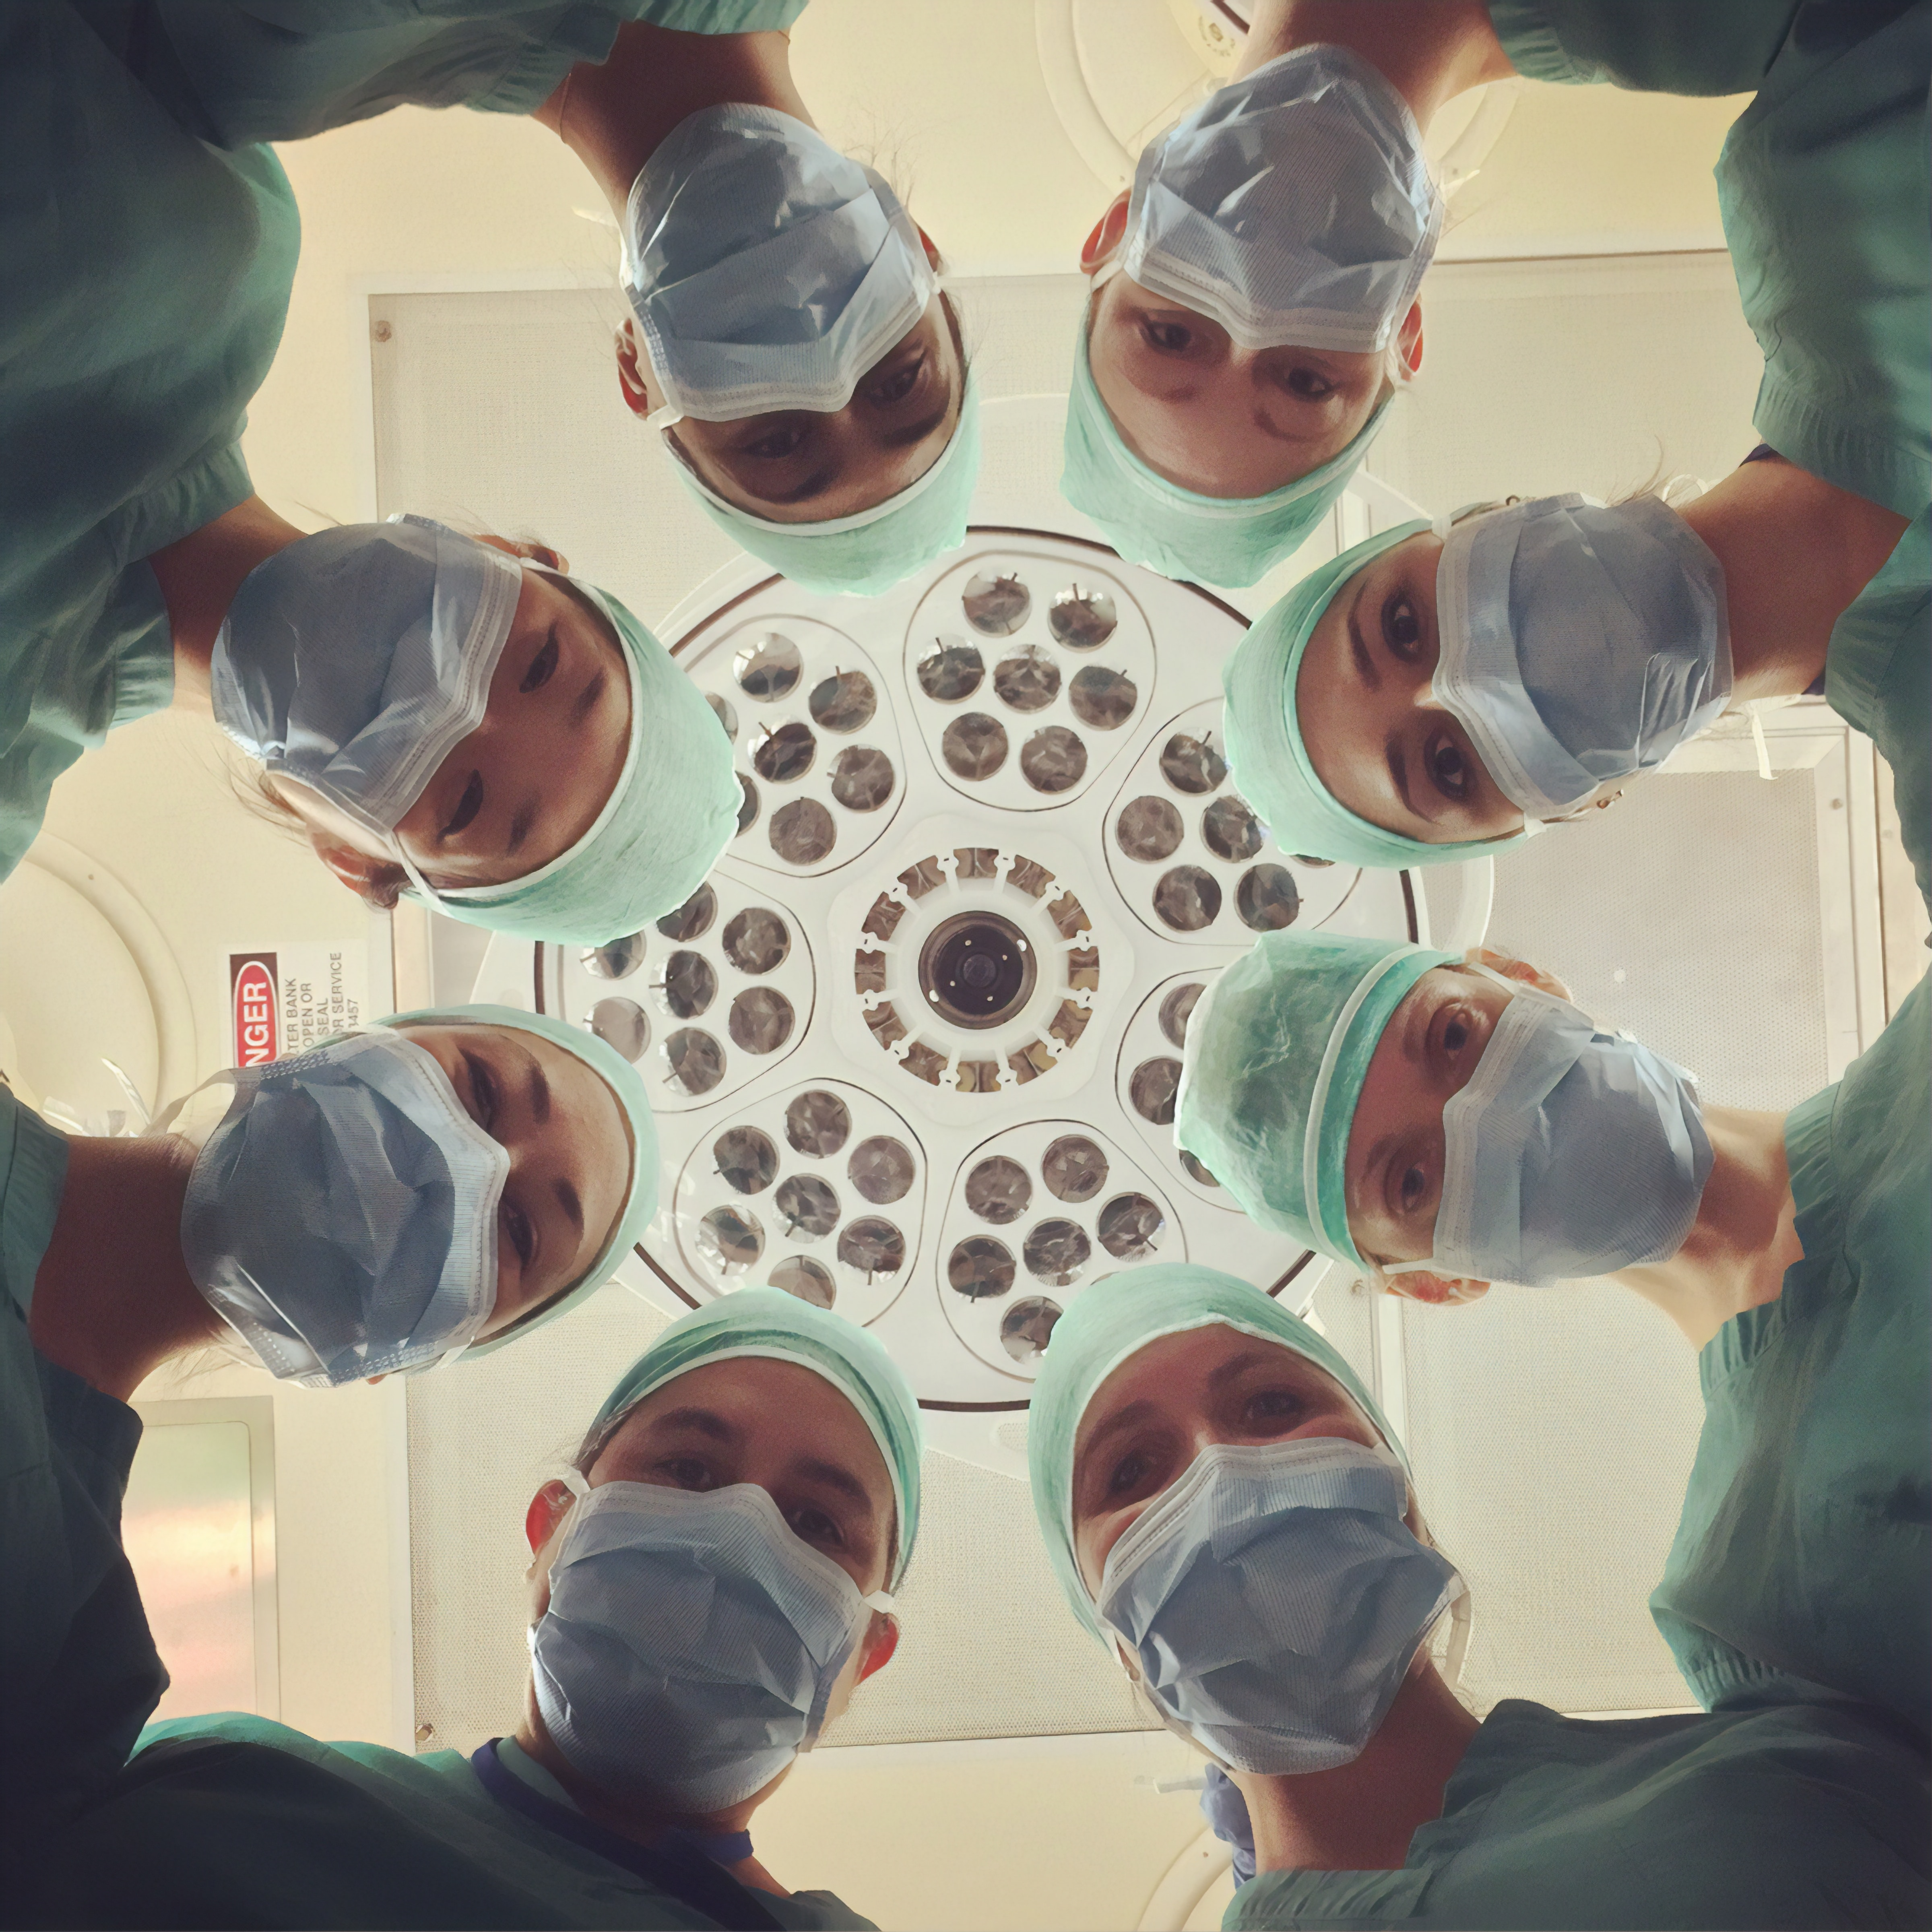

In [119]:
Image(filename = 'national-cancer-institute-701-FJcjLAQ-unsplash.jpg')

# References and Notes:

    1. Evaluating the logistic classifier model: https://towardsdatascience.com/metrics-for-evaluating-machine-learning-classification-models-python-example-59b905e079a5
    2. Turi Create API: https://apple.github.io/turicreate/docs/api/index.html
    3. Understanding AUC and ROC curve: https://towardsdatascience.com/understanding-the-roc-curve-and-auc-dd4f9a192ecb
    4. Inserting image: https://apple.github.io/turicreate/docs/api/generated/turicreate.Image.html
    5. Image 1: https://unsplash.com/photos/k7ll1hpdhFA
    6. Image 2: Photo by <a href="https://unsplash.com/@nci?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">National Cancer Institute</a> on <a href="https://unsplash.com/s/photos/heart-disease?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>
  
    Finally, this data set is supported by https://www.kaggle.com/fedesoriano/stroke-prediction-dataset
    

### Note: I learnt almost everything online by myself and this is my first ever independent project. My approach and methods may be inaccurate. Feel free to help me refine it!